<h1 style="font-size:35px;
        color:black;
        ">Tutorial 03: Single-qubit Hamiltonian and Quantum Measurements </h1>

In [1]:
from qiskit import *
import numpy as np
from numpy import linalg as la
from qiskit_aer import Aer

In many applications of quantum computing, we need to measure the expectation values of Pauli operators X, Y, Z. For example, in physics, if we wish to measure the energy of a systems, we typically first map the Hamiltonian to (strings of) Pauli operators, and measure their expectation values to reconstruct the energy.

Unfortunately, it is impossible to simultaneously compute these values (since X, Y, Z do not commute), thus requiring many executions of the same circuit.  In addition, measurements are, in practice, restricted to the computational basis (Z-basis), so that the system needs to be rotated with some unitary transformation (corresponing to the basis change), to measure the X and Y components.

<h2 style="font-size:24px;">Part 1: Measuring the state of a qubit</h2>

<br>
<div style="background: #E8E7EB; border-radius: 5px;
-moz-border-radius: 5px;">
  <p style="background: #800080;
            border-radius: 5px 5px 0px 0px;
            padding: 10px 0px 10px 10px;
            font-size:18px;
            color:white;
            "><b>Goal</b></p>
    <p style=" padding: 0px 0px 10px 10px;
              font-size:16px;"> Measure expectation values of Pauli operators to determine the state of a qubit</p>
</div>

<h3 style="font-size: 20px">&#128211; 1. Expectation values of the Pauli operators for an arbitrary qubit state $|\psi\rangle$ in the computational basis. </h3>

Measurements are in practice only performed in the computational basis. However, sometimes we want to perform a measurement in some other basis, defined by a complete set of orthonormal states. To perform this measurement, we simply need to unitarily transform from the basis we wish to perform the measurement in, to the computational basis, and then measure. 

For example, we discussed in the lecture how to measure the Pauli operator $X$ by using the relation $X = H Z H$. Thus $$\braket{\psi | X | \psi}= \braket{\psi | H Z H | \psi}$$ which shows that it is equivalent to directly measure $X$, or to apply $H$ to $\ket{\psi}$ followed by a measurement of $Z$. A similar procedure can be applied to measure the $Y$ Pauli operator, as you will show below.

1) The $Y$ matrix in the computational basis is given by
$$
\begin{align}
Y = 
\begin{pmatrix}
0 & -i \\
i & 0
\end{pmatrix}
\; .
\end{align}
\\
$$
Show that Y can be diagonalized as $Y = U^\dagger Z U$, and express $U$ in terms of the Hadamard gate $H$ and phase gate $S$:

$$
\begin{align}
H = \frac{1}{\sqrt{2} }
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
\; ,
\hspace{1cm}
S= 
\begin{pmatrix}
1 & 0\\
0 & i
\end{pmatrix}
\; ,
\end{align}
\\
$$


This result can be used to compute the expectation value of Y when one can only measure in the computational basis.


<h3 style="font-size: 20px">2. Measure the Bloch sphere coordinates of a qubit using the Aer simulator and plot the vector on the Bloch sphere.</h3>

<h4 style="font-size: 17px">&#128211;Step A. Create a qubit state using the circuit method <code>initialize</code> with two random complex numbers as the parameter. </h4> 

Info about the `initialize` function can be found [here](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.Initialize).

For example, the command `vector=[a * complex(1,0), complex(b, c)]` creates a 1-qubit state vector = $ a |0\rangle + (b+ic) |1\rangle$ and the command `qc.initialize(vector)` initializes the 1-qubit register 'qc' to this arbitrary state vector.


<h4 style="font-size: 15px"> You can use the functions </h4>

`np.random.random()` which generates a real random number in the interval [0,1)

and `np.random.uniform(x,y)` which generates a real random number in the interval [x,y]

to create a random state vector 

$$
| \psi \rangle = \cos(\theta/2) |0\rangle + e^{i\phi} \sin(\theta/2)  |1\rangle
$$

with $\theta \in [0,\pi]$ and $\phi \in [0, 2\pi )$

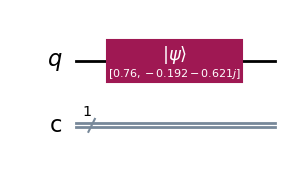

In [13]:
qc = QuantumCircuit(1, 1)

#### your code goes here
theta = np.random.uniform(0,np.pi)
phi = np.random.uniform(0,2*np.pi)
a = np.cos(theta/2)
b = np.exp(1j*phi)*np.sin(theta/2)
vector = [a* complex(1,0), b* complex(0,1)]
qc.initialize(vector)
####

qc.draw('mpl')


<h4 style="font-size: 17px">&#128211; Step B. Build the circuits to measure the expectation values of $X, Y, Z$ gate based on the relations between Pauli operators that you indicated in section 1.  

The circuit for $Z$ gate measurement is given as an example.

Remember that $S$ is not Hermitian! The command for the gate $S^\dagger$ is `sdg`

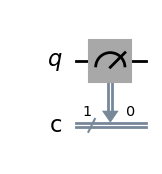

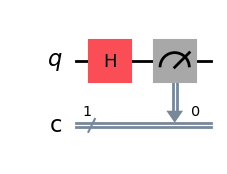

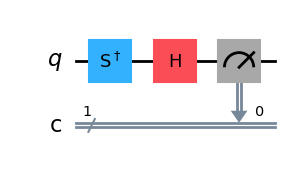

In [14]:
# z measurement of qubit 0
measure_z = QuantumCircuit(1,1)
measure_z.measure(0,0)



# x measurement of qubit 0
measure_x = QuantumCircuit(1,1)
### your code goes here
measure_x.h(0)
measure_x.measure(0,0)
###



# y measurement of qubit 0
measure_y = QuantumCircuit(1,1)
### your code goes here
measure_y.sdg(0)
measure_y.h(0)
measure_y.measure(0,0)

###

display(measure_z.draw('mpl'))
display(measure_x.draw('mpl'))
display(measure_y.draw('mpl'))


<h4 style="font-size: 17px">&#128211; Step C. Deduce the expectation values from the measurement outputs</h4>

<h4 style="font-size: 17px">    1. How are the expectation values of the X, Y and Z operators related to the probabilities of measurement outcomes of the circuit? <h4 style="font-size: 14px"> 

Hint: You can use the spectral decomposition of Z in terms of its eigenvalues and eigenstates: $Z = + |0\rangle \langle 0 | - |1\rangle \langle 1 |$

<h4 style="font-size: 17px">    2. Complete and execute the cell below to obtain the expectation values of the measurements along the three axes x,y and z, using the Aer simulator.</h4>

 

In [18]:
shots = 10000 # number of samples used for statistics
sim = Aer.get_backend('aer_simulator')
expect_val = []

for measure_circuit in [measure_x, measure_y, measure_z]:
    
    # run the circuit with the selected measurement and get the number of samples that output each bit value
    circ_trans = transpile(qc.compose(measure_circuit), sim)
    counts = sim.run(qc.compose(circ_trans), shots=shots).result().get_counts()

    # calculate the probabilities for each bit value
    probs = {}
    for output in ['0','1']:
        if output in counts:
            probs[output] = counts[output]/shots
        else:
            probs[output] = 0
    
    # append the expectation values:
    ### your code goes here
    expect_val.append(probs['0']-probs['1'])
    ### 

# normalization
expect_val_norm = expect_val/la.norm(expect_val)

print('The expectation values for the measurements along X,Y,Z are [{0:4.3f}, {1:4.3f}, {2:4.3f}]'
      .format(*expect_val_norm))    

The expectation values for the measurements along X,Y,Z are [-0.279, -0.948, 0.154]


<h4 style="font-size: 17px">    3. How can we use these expectation values to determine the state $\psi$ that was prepared in step A?</h4>
(i.e. to specify the angles $\phi$ and $\theta$)

<h4 style="font-size: 17px">4. Plot the corresponding state vector on the Bloch sphere.</h4>

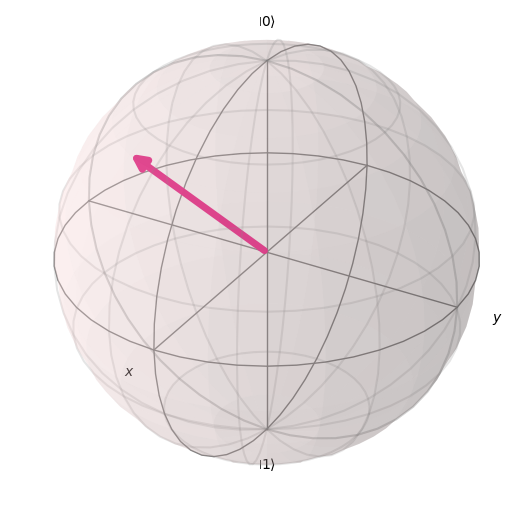

In [19]:
from qiskit.visualization import plot_bloch_vector

bloch_vector = expect_val_norm

plot_bloch_vector( bloch_vector )

<h2 style="font-size:24px;">Part 2: Measuring the energy of a single-qubit system</h2>

<br>
<div style="background: #E8E7EB; border-radius: 5px;
-moz-border-radius: 5px;">
  <p style="background: #800080;
            border-radius: 5px 5px 0px 0px;
            padding: 10px 0px 10px 10px;
            font-size:18px;
            color:white;
            "><b>Goal</b></p>
    <p style=" padding: 0px 0px 10px 10px;
              font-size:16px;"> Use the previous circuits computing the expectation values of the Pauli operator to obtain the energy of a single qubit system</p>
</div>


Consider the following one-qubit Hamiltonian expressed in the computational basis $\{ \ket{0}, \ket{1} \} $:
\begin{align}
\hat H &= \hat H_E + \hat H_B \nonumber \\
&= c_E 
\begin{pmatrix}
0 & 0 \\
0 & 1
\end{pmatrix}
+ $\frac{1}{2}$ c_B
\begin{pmatrix}
2 & -1 \\
-1 & 2
\end{pmatrix} 
\; .
\end{align}
For your information, physically, this Hamiltonian describes a single plaquette in SU(2) lattice gauge theory, truncated down to a two-dimensional Hilbert space.
The first term $\hat H_E$ corresponds to the electric energy of the field, while the second term $\hat H_B$ corresponds to the magnetic energy.



<h4 style="font-size: 17px"> 
1. Express the Hamiltonian $\hat H$ in terms of the identity $\hat 1$ and the Pauli operators $\hat X$, $\hat Y$ and $\hat Z$. </h4>

H = 1 - Z + 2*1 - X

<h4 style="font-size: 17px"> 
2. Use the circuits developped above in Part 1 to reconstruct the energy of the system (expectation value of the Hamiltonian $\langle \psi | \hat{H} \psi \rangle$). Consider for example $\ket{\psi} = \ket{+} = \frac{(\ket{0}+\ket{1})}{ \sqrt{2}} $, and $c_E=c_B=1$.  </h4>

In [ ]:
##### your code goes here

#####

<h4 style="font-size: 17px"> 
3. Precision of the results:</h4> 

We want to determine how many measurements (number of "shots" $n_{shots}$) are required to obtain a $0.5 \%$ precision determination of the above energy, let's call it $E_0$.
The measurement procedure performed $n_{shots}$ times gives us some estimate of $E_0$. If we repeat this, say $1000$ times, we can deduce the mean value $\bar{E}_0$ and standard deviation $\sigma_{E_0}$ for $E_0$. A measure of the precision can then be obtain as 
\begin{equation}
\frac{\sigma_{E_0}  \times 100} {\bar{E}_0} \hspace{1cm } (\%)
\end{equation}
Adjust the number of shots iteratively in order to determine what value of $n_{shots}$ provides a precision $\leq 0.5 \%$.
You can use the functions `numpy.mean()` and `numpy.std()` provided by the Python NumPy library to determine the mean value and standard deviation. 

In [ ]:
##### your code goes here

#####